# Iman Noor
---

# **Linear Regression Models**

Linear regression is a type of `supervised` machine learning algorithm that computes the linear relationship between the dependent variable and one or more independent features by fitting a linear equation to observed data.

When there is only one independent feature, it is known as `Simple Linear Regression` and when there are more than one feature, it is known as` Multiple Linear Regression`.

## **Types of Linear Regression**

There are two main types of linear regression:

## **1. Simple Linear Regression**

This is the simplest form of linear regression, and it involves only one independent variable and one dependent variable. The equation for simple linear regression is: 
> **𝑦 = 𝛽0 + 𝛽1𝑋**

where:
- Y is the dependent variable
- X is the independent variable
- β0 is the intercept
- β1 is the slope

## **2. Multiple Linear Regression**

This involves more than one independent variable and one dependent variable. The equation for multiple linear regression is: 
> **𝑦 = 𝛽0 +𝛽1𝑋 + 𝛽2𝑋 + … + 𝛽𝑛𝑋**

where:
- Y is the dependent variable
- X1, X2, …, Xp are the independent variables
- β0 is the intercept
- β1, β2, …, βn are the slopes

**The goal of the algorithm is to find the best Fit Line equation that can predict the values based on the independent variables.**

## **Best Line Fit**
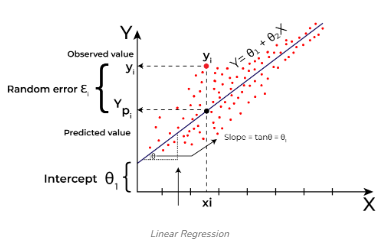

## Importing libraries

- *Importing to split our data into traning and testing parts*
- *Importing mean_squared_error and r2_score to find error and thus evaluating model*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('faithful.csv')
df.head()

,Index,Eruption length (mins),Eruption wait (mins)
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


## 1. Gradient Descent Approach
The gradient descent approach iteratively adjusts the weights to minimize the cost function. This is particularly useful for larger datasets or more complex models.

- **Weight Update Formula:**
    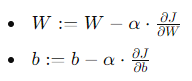

- **Algorithm Steps:**
  - Initialize weights `W` and bias `b` to zero or small random values.
  - For a predefined number of iterations, update the weights and bias using the gradients.

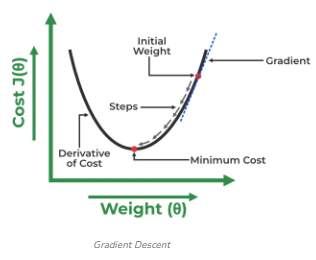

In [3]:
class LinearRegression():
    def __init__(self, lr, n_iter):
        self.lr = lr
        self.n_iter = n_iter
        
    # Function for training of model
    def fit(self, X, Y):
        self.n_samples, self.n_features = X.shape
        self.W = np.zeros(self.n_features)
        self.b = 0
        self.X = X
        self.Y = Y
        
        # Gradient decent learning
        for i in range(self.n_iter):
            self.update_weights()
        return self
    
    # Function to update weights in gradient descent
    def update_weights(self):
        y_pred = self.predict(self.X)
        
        # Gradient calculation
        dW = -(2*(self.X.T).dot(self.Y-y_pred))/self.n_samples
        db = -2*np.sum(self.Y-y_pred)/self.n_samples
        
        # Weights updation
        self.W = self.W - self.lr * dW
        self.b = self.b - self.lr * db
        
    # Prediction function
    def predict(self, X):
        return X.dot(self.W)+self.b

In [4]:
def main():
    X = df[' Eruption length (mins)'].values.reshape(-1, 1)
    Y = df['Eruption wait (mins)'].values
    X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
    
    # Training 
    model = LinearRegression(n_iter=1000, lr=0.01)
    model.fit(X_train, Y_train)
    
    # Prediction on test set
    y_pred = model.predict(X_test)
    print('Predicted values: ', np.round(y_pred[:3], 2))
    print('Real values: ', y_test[:3] )   
    print('Trained W(weight): ', round( model.W[0], 2 ) ) 
    print('Trained b: ', round( model.b, 2 ) ) 
      
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'\nMean Squared Error: {mse}')
    print(f'R-squared: {r2}')
        
    # Visualization on test set  
    plt.scatter( X_test, y_test, color = 'blue' ) 
    plt.plot( X_test, y_pred, color = 'orange' ) 
    plt.title( 'Eruption length vs Eruption wait', weight='bold' ,fontsize=16) 
    plt.xlabel( 'Eruption length' ) 
    plt.ylabel( 'Eruption wait' ) 
      
    plt.show() 

Predicted values:  [85.74 52.6  80.41]
Real values:  [94 56 82]
Trained W(weight):  11.84
Trained b:  28.93

Mean Squared Error: 36.82324983750139
R-squared: 0.7990178709593592


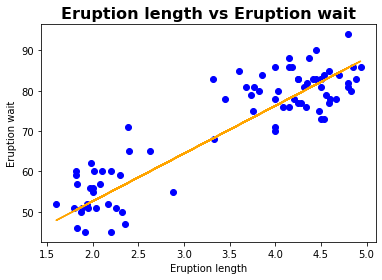

In [5]:
if __name__ == '__main__':
    main()

## 2. Least Squares Method
The least squares method calculates the best-fitting line by minimizing the sum of the squares of the vertical deviations from each data point to the line. This method uses a closed-form solution to find the optimal weights and is particularly effective for small to medium-sized datasets.

- **Mathematical Formulas:**
  - **Slope (`b_1`)**:
    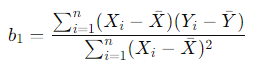
  - **Intercept (`b_0`)**:
    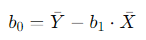

- **Algorithm Steps:**
  - Calculate the mean of `X` and `Y`.
  - Compute the numerator and denominator for the slope (`b_1`).
  - Calculate the intercept (`b_0`) using the slope and means.
  - The resulting slope and intercept represent the best-fit line minimizing the squared errors.

In [6]:
df.head()

,Index,Eruption length (mins),Eruption wait (mins)
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


In [7]:
X = df[' Eruption length (mins)'].values
Y = df['Eruption wait (mins)'].values

In [8]:
# Calculating means of inputs and outputs
x_mean = np.mean(X)
y_mean = np.mean(Y)

In [9]:
# Total no. of values
n = len(X)

numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean) ** 2
    
b1 = numerator / denominator
b0 = y_mean - (b1 * x_mean)
print(b1, b0)

10.72964139513353 33.47439702275334


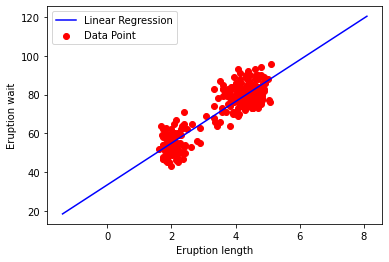

In [10]:
x_max = np.max(X) + 3
x_min = np.min(X) - 3
x = np.linspace(x_min, x_max, 1000)
y = b0 + b1 * x
plt.plot(x, y, color='#0000ff', label='Linear Regression')
plt.scatter(X, Y, color='#ff0000', label='Data Point')
plt.xlabel('Eruption length')
plt.ylabel('Eruption wait')
plt.legend()
plt.show()

In [11]:
rmse = 0 # Root mean square error
for i in range(n):
    y_pred=  b0 + b1* X[i]
    rmse += (Y[i] - y_pred) ** 2
    
rmse = np.sqrt(rmse/n)
print(rmse)

5.89222663589395


In [12]:
SOS = 0 # Sum of squares
SOR = 0 # Sum of residuals
for i in range(n) :
    y_pred = b0 + b1 * X[i]
    SOS += (Y[i] - y_mean) ** 2
    SOR += (Y[i] - y_pred) **2
    
score  = 1 - (SOR/SOS)
print(score)

0.8114607609733098
